### モデル評価とは
機械学習で得られた分類モデルや、回帰モデルなどが、正しく機能しているかを検証すること  
  
ここではまず、分類についての評価指標を説明する  
分類は以下の2つの視点で評価される
1. カテゴリの分類精度
2. 予測確立の正確さ

### カテゴリの分類精度
カテゴリの分類精度を定量化する手法には以下のものがある  
* 適合率(precision)
* 再現率(recall)
* F値(F-Value)
* 正解率(accracy)

そして、これらは混同行列(confusion matrix)で計算される  
  
### 混同行列とは
予測と実績のクラスラベルの組み合わせを集計した表  
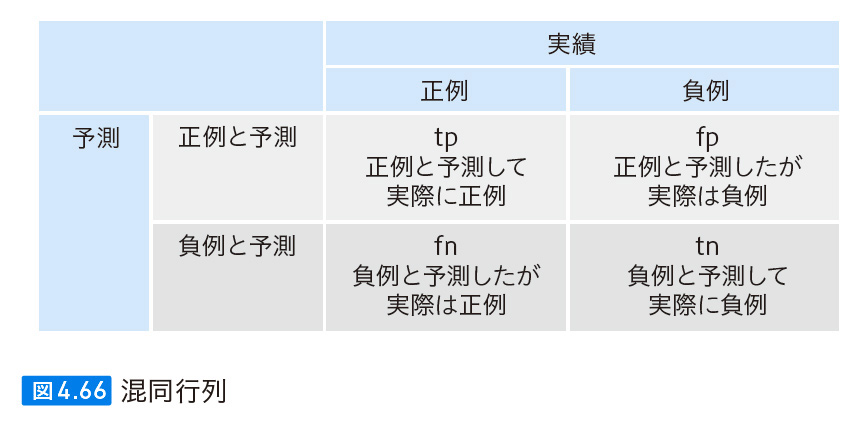  

まず、分類を2値で考える  
イヌかネコか
ここでは、イヌを正例、ネコを負例として扱う  
  
* tp : 実際にイヌで、予測もイヌだった場合
* fn : 実際にイヌで、予測がネコだった場合
* fp : 実際にネコで、予測がイヌだった場合
* tn : 実際にネコで、予測もネコだった場合  
  
t -> True  
f -> False  
  
p -> Positive  
n -> Negative  
  
ここで、分類精度を上げるのは**tpとtn**  
分類精度を下げるのは**fpとfn**  

### 適合率
  
$適合率 = \frac{tp}{tp+fp}$  
  
つまり、イヌと予測した数の内(全positive)、実際に正解だった割合によって、分類精度を評価する指標  
  
### 再現率
  
$再現率 = \frac{tp}{tp+fn}$
  
実際にイヌである数の内(tp+fn)、正しく予測出来ていた割合によって、分類精度を評価する指標  
  
### F値
  
$F = \frac{2}{\frac{1}{適合率}+\frac{1}{再現率}} = 2\times 適合率 \times \frac{再現率}{適合率+再現率}$  
  
適合率と、再現率の調和平均  
**割合の平均を出すときは調和平均が良い**  
  
一般に、適合率と再現率はトレードオフの関係にある  
fpとfnは排反であるため、どちらかでしかない、  
つまり、どちらかが大きければ、もう一方は小さくなる  
  
fp(実際はネコなのに、イヌと予測する数)とfn(実際はイヌなのに、ネコと予測する数)はトレードオフという事  
つまり、イヌと予測しやすいモデルと、ネコと予測しやすいモデルは排反であるという事  
  
F値は、そのバランスを見る事が出来る指標
  
### 正解率  
  
$正解率 = \frac{tp+tn}{tp+fp+fn+tn}$
  
つまり、全体数に対する、正解数の割合によって分類精度を評価する指標

In [3]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
# 評価のため2クラス分類にするための分割
data_set = iris.data[:100,:]
label = iris.target[:100]

train_data,test_data,train_label,test_label = train_test_split(data_set,label,test_size=0.3)

svc = SVC()
svc.fit(train_data,train_label)

label_predict = svc.predict(test_data)

# 評価
from sklearn.metrics import classification_report
print(classification_report(test_label,label_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



precision : 適合率  
recall : 再現率  
f1-score : F値  
support : データ件数  
  
0はクラス0,1はクラス1  
それぞれを正例としたときの各評価指標を出している  
  
今回の場合は、すべての指標において、完璧に分類が出来ている

### 交差検証
機械学習では、交差検証(cross validation)という方法がよく用いられる  
  
これは、学習データとテストデータの分割を複数回行い、  
その分、モデル構築と評価を行う処理  
  
これで、同じデータばかりで学習し、結果が偏るのを防ぎ、  
あらゆるテストを行い、普遍的に分類精度が高いモデルを構築するのに役立つ  
  
交差検証にはいくつかの方法があるが、よく**k分割交差検証**というのが用いられる  
  
### k分割交差検証
例えば、データセットを10分割にする  
9つの集合を学習データに、  
残り1つをテストデータセットに使用する  
どれがテストに選ばれるのかはランダムとする  
  
これを10回行う場合、10分割交差検証という  
  
また、目的変数(クラスラベル)のクラスの割合が一定となるように調整されるk分割交差検証の事を  
**層化k分割交差検証**という

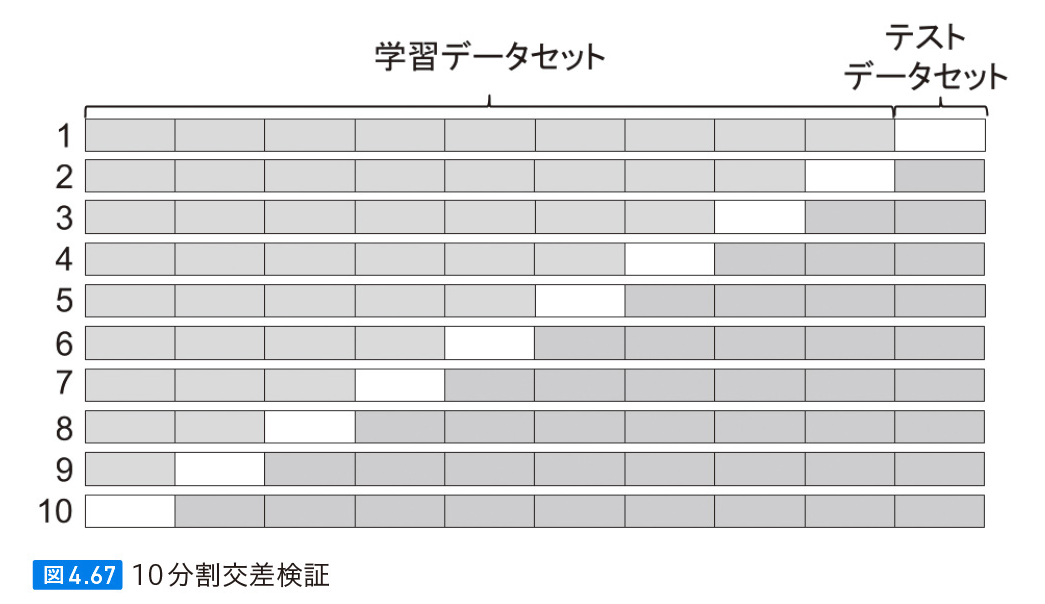  

scikit-learnでは簡単に交差検証を行うことが出来る

In [4]:
from sklearn.model_selection import cross_val_score

svc = SVC()
# 10分割交差検証を行う。評価指標はprecision(適合率)
cross_val_score(svc,data_set,label,cv=10,scoring="precision")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

この結果は、渡したデータ、ラベルにおいて10回とも適合率が100%だったことを示す  
公差検証は、主に**ハイパーパラメータの調整**で用いられる  
このことは後述される

### 予測確立の正確さ
データに対する予測確立の正確さを定量化する指標にはいくつかある  
* ROC(Receiver Operating Characteristic)曲線
* AUC(Area Under the Curve)
  
例えば以下のような表を作成する  
予測退会確率と、その正解を並べた表である  
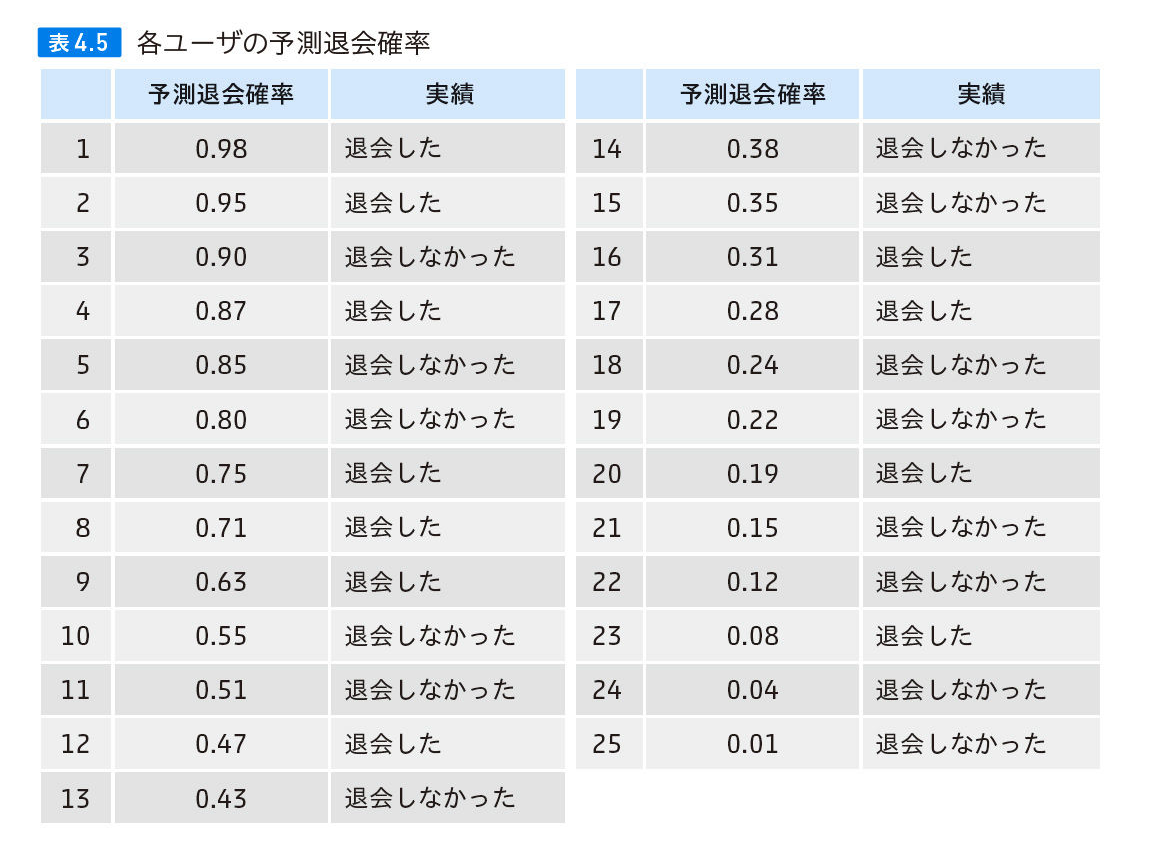  

ここで、予測と実績率から、偽陽性率(退会したと予測)と真陽性率(退会すると予測)とを算出する  
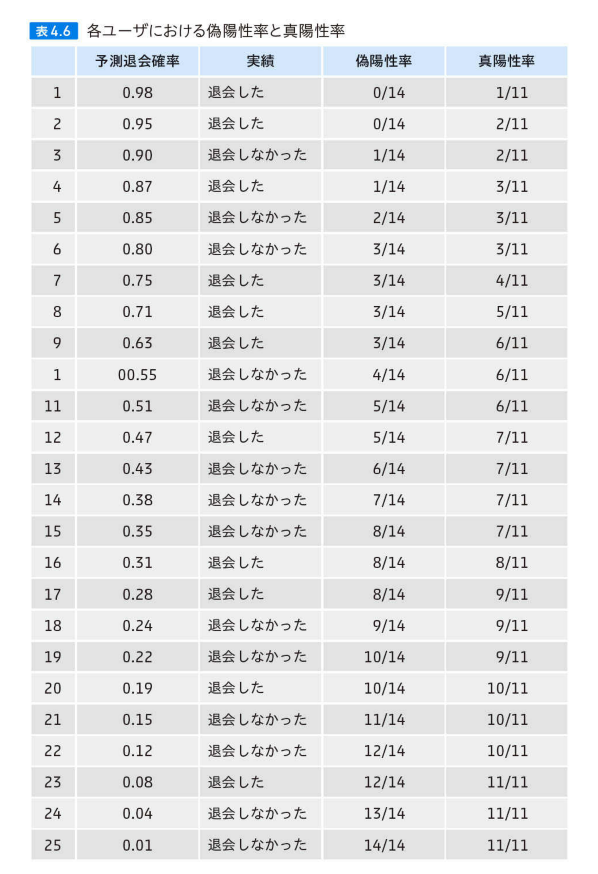  
今回の場合、実際に退会した(陽性)数は11  
退会しなかった(偽陽性)数は14である

ROC曲線は、陽性と判断する確率の閾値を決める。  
それより、予測退会確率が少しでも出れば、退会すると考える  
(上記の例だとまずは、0%以上で退会と推定)  

そのため、退会すると予想したのに(予測退会確率が何かしら出ている)、退会しなかった場合は偽陽性と判断される  
  
ここで、偽陽性率を最小にするように、陽性と判断する閾値を変えていく 

Text(0, 0.5, 'true positive rate')

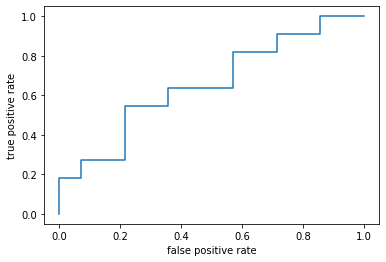

In [6]:
import numpy
import matplotlib.pyplot as pyplot

# 偽陽性列
fpr = numpy.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14])/14
# 陽性列
tpr = numpy.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11])/11

canvas,sub_plots = pyplot.subplots()
sub_plots.step(fpr,tpr)
sub_plots.set_xlabel("false positive rate")
sub_plots.set_ylabel("true positive rate")

上記のステップ状のグラフが、ROC曲線である  
**ROC曲線は、長方形の集まり**と考えることも出来る  
  
このことから、各長方形の面積を加算すると**AUC**が算出できる  
tpr, fprはそれぞれ1が最大であるため、AUCが取り得る最大数は1である  
  
それはつまりどいう言うグラフかというと  
**偽陽性が0で陽性が1となる**ROC曲線である  
  
つまり、**1に近づくほど、陽性と判断する割合が大きい(間違い率 = 偽陽性率はさがる)**という事になる
  
このことから、AUCはクラス分類を行った結果に対する評価指標として効果的である

In [7]:
from sklearn.metrics import roc_curve

# 各ユーザーが退会したかどうかを表すラベル
# 1:退会した
labels = numpy.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])

# 各ユーザの予測退会確率
probs = numpy.array([0.98,0.95,0.9,0.87,0.85,
                     0.8,0.75,0.71,0.63,0.55,
                     0.51,0.47,0.43,0.38,0.35,
                     0.31,0.28,0.24,0.22,0.19,
                     0.15,0.12,0.08,0.04,0.01])

# 偽陽性率、真陽性率、閾値を算出
fpr,tpr,threshold = roc_curve(labels,probs)

print(f"偽陽性率:\n{fpr}")
print(f"陽性率:\n{tpr}")
print(f"閾値:\n{threshold}")

偽陽性率:
[0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
陽性率:
[0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]
閾値:
[1.98 0.98 0.95 0.9  0.87 0.8  0.63 0.51 0.47 0.35 0.28 0.22 0.19 0.12
 0.08 0.01]


Text(0, 0.5, 'true positive rate')

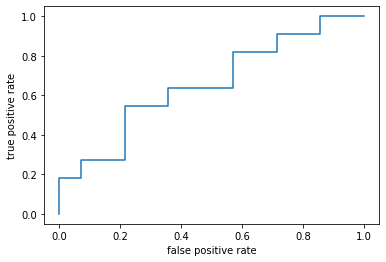

In [8]:
canvas,sub_plots = pyplot.subplots()
sub_plots.step(fpr,tpr)
sub_plots.set_xlabel("false positive rate")
sub_plots.set_ylabel("true positive rate")

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(labels,probs)

0.6558441558441558